# Imports

In [ ]:
!pip install matplotlib
!pip install pandas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from transformers import BertTokenizer
import numpy as np

# Data path

In [3]:
data_path = "hf://datasets/owaiskha9654/PubMed_MultiLabel_Text_Classification_Dataset_MeSH/PubMed Multi Label Text Classification Dataset Processed.csv"

# Cleaning

## Read data

In [4]:
data = pd.read_csv(data_path)
data.head()

,Title,abstractText,meshMajor,pmid,meshid,meshroot,A,B,C,D,E,F,G,H,I,J,L,M,N,Z
0,Expression of p53 and coexistence of HPV in pr...,Fifty-four paraffin embedded tissue sections f...,"['DNA Probes, HPV', 'DNA, Viral', 'Female', 'H...",8549602,"[['D13.444.600.223.555', 'D27.505.259.750.600....","['Chemicals and Drugs [D]', 'Organisms [B]', '...",0,1,1,1,1,0,0,1,0,0,0,0,0,0
1,Vitamin D status in pregnant Indian women acro...,The present cross-sectional study was conducte...,"['Adult', 'Alkaline Phosphatase', 'Breast Feed...",21736816,"[['M01.060.116'], ['D08.811.277.352.650.035'],...","['Named Groups [M]', 'Chemicals and Drugs [D]'...",0,1,1,1,1,1,1,0,1,1,0,1,1,1
2,[Identification of a functionally important di...,The occurrence of individual amino acids and d...,"['Amino Acid Sequence', 'Analgesics, Opioid', ...",19060934,"[['G02.111.570.060', 'L01.453.245.667.060'], [...","['Phenomena and Processes [G]', 'Information S...",1,1,0,1,1,0,1,0,0,0,1,0,0,0
3,Multilayer capsules: a promising microencapsul...,"In 1980, Lim and Sun introduced a microcapsule...","['Acrylic Resins', 'Alginates', 'Animals', 'Bi...",11426874,"[['D05.750.716.822.111', 'D25.720.716.822.111'...","['Chemicals and Drugs [D]', 'Technology, Indus...",1,1,1,1,1,0,1,0,0,1,0,0,0,0
4,"Nanohydrogel with N,N'-bis(acryloyl)cystine cr...",Substantially improved hydrogel particles base...,"['Antineoplastic Agents', 'Cell Proliferation'...",28323099,"[['D27.505.954.248'], ['G04.161.750', 'G07.345...","['Chemicals and Drugs [D]', 'Phenomena and Pro...",1,1,0,1,1,0,1,0,0,1,0,0,0,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         49998 non-null  object
 1   abstractText  50000 non-null  object
 2   meshMajor     50000 non-null  object
 3   pmid          50000 non-null  int64 
 4   meshid        50000 non-null  object
 5   meshroot      50000 non-null  object
 6   A             50000 non-null  int64 
 7   B             50000 non-null  int64 
 8   C             50000 non-null  int64 
 9   D             50000 non-null  int64 
 10  E             50000 non-null  int64 
 11  F             50000 non-null  int64 
 12  G             50000 non-null  int64 
 13  H             50000 non-null  int64 
 14  I             50000 non-null  int64 
 15  J             50000 non-null  int64 
 16  L             50000 non-null  int64 
 17  M             50000 non-null  int64 
 18  N             50000 non-null  int64 
 19  Z   

In [6]:
data.describe()

,pmid,A,B,C,D,E,F,G,H,I,J,L,M,N,Z
count,5.000000e+04,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000
mean,1.665441e+07,0.465260,0.931540,0.52906,0.621480,0.784040,0.177700,0.672180,0.121380,0.111900,0.110620,0.150060,0.427260,0.45838,0.160980
std,9.348618e+06,0.498797,0.252536,0.49916,0.485023,0.411491,0.382264,0.469424,0.326572,0.315247,0.313664,0.357134,0.494686,0.49827,0.367516
min,2.200000e+01,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,8.698276e+06,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,1.742473e+07,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,2.466543e+07,1.000000,1.000000,1.00000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.00000,0.000000
max,3.321190e+07,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


In [7]:
data.shape # Rows, cols

(50000, 20)

In [8]:
# nan values
data.isnull().sum()

Title           2
abstractText    0
meshMajor       0
pmid            0
meshid          0
meshroot        0
A               0
B               0
C               0
D               0
E               0
F               0
G               0
H               0
I               0
J               0
L               0
M               0
N               0
Z               0
dtype: int64

In [9]:
data["Title"].nunique(), data["abstractText"].nunique()

(49922, 49924)

In [10]:
duplicates_abstract = data["abstractText"].duplicated()
duplicates_abstract_nr = duplicates_abstract.sum()
duplicated_abstract_idx = data[duplicates_abstract].index

print(f"Number of duplicates in column 'abstractText': {duplicates_abstract_nr}")
print(f"Indexes of duplicates in column 'abstractText':")
print(duplicated_abstract_idx)

Number of duplicates in column 'abstractText': 76
Indexes of duplicates in column 'abstractText':
Index([ 1759,  3713,  9054, 10780, 11018, 11939, 13750, 15609, 17207, 17808,
       19216, 19262, 20396, 22990, 23959, 24888, 25138, 26050, 26759, 26781,
       26788, 27157, 27189, 29160, 29304, 30925, 30937, 32829, 33555, 33992,
       34161, 34464, 34629, 34712, 34809, 34856, 35190, 35285, 35774, 36395,
       37576, 39045, 39242, 39693, 39704, 39854, 40122, 40765, 40957, 41387,
       41645, 41786, 42229, 42366, 42543, 43351, 43646, 43746, 44258, 45433,
       46072, 46141, 46202, 46715, 46744, 46873, 46990, 47865, 48133, 48334,
       48517, 48569, 48670, 49196, 49710, 49746],
      dtype='int64')


In [11]:
duplicate_pairs = data.groupby('abstractText').filter(lambda x: len(x) > 1)

duplicate_pairs = duplicate_pairs.reset_index()

for name, group in duplicate_pairs.groupby('abstractText'):
    for idx, row in group.iterrows():
        print(f"  Index: {row['index']}")
    print()

  Index: 625
  Index: 1759

  Index: 35529
  Index: 40957

  Index: 14595
  Index: 41786

  Index: 18342
  Index: 22990

  Index: 9151
  Index: 26759

  Index: 1190
  Index: 19262

  Index: 14004
  Index: 34464

  Index: 41416
  Index: 46744

  Index: 4940
  Index: 49710

  Index: 40484
  Index: 49746

  Index: 648
  Index: 3713

  Index: 10180
  Index: 41387

  Index: 13049
  Index: 13750

  Index: 11264
  Index: 17808

  Index: 104
  Index: 19216

  Index: 21663
  Index: 34809

  Index: 17257
  Index: 27189

  Index: 2655
  Index: 46141

  Index: 6094
  Index: 17207

  Index: 26234
  Index: 48670

  Index: 32870
  Index: 36395

  Index: 24240
  Index: 34629

  Index: 13550
  Index: 41645

  Index: 27672
  Index: 39045

  Index: 26886
  Index: 44258

  Index: 6284
  Index: 34712

  Index: 7491
  Index: 40765

  Index: 2624
  Index: 30937

  Index: 14059
  Index: 34856

  Index: 48862
  Index: 49196

  Index: 1810
  Index: 9054

  Index: 8527
  Index: 11939

  Index: 14016
  Index: 425

In [12]:
# drop duplicates
data = data.drop_duplicates(subset=['abstractText'], keep="first")

data["abstractText"].duplicated().sum()

np.int64(0)

**no more duplicates**

In [13]:
data.shape

(49924, 20)

In [14]:
# unique labels
data['meshroot_labels'] = data['meshroot'].apply(lambda x: eval(x))
unique_labels = sorted(set([single_label  for row_labels in data['meshroot_labels'] for single_label in row_labels]))
nr_labels = len(unique_labels)
unique_labels, nr_labels

(['Analytical, Diagnostic and Therapeutic Techniques, and Equipment [E]',
  'Anatomy [A]',
  'Anthropology, Education, Sociology, and Social Phenomena [I]',
  'Chemicals and Drugs [D]',
  'Disciplines and Occupations [H]',
  'Diseases [C]',
  'Geographicals [Z]',
  'Health Care [N]',
  'Humanities [K]',
  'Information Science [L]',
  'Named Groups [M]',
  'Organisms [B]',
  'Phenomena and Processes [G]',
  'Psychiatry and Psychology [F]',
  'Technology, Industry, and Agriculture [J]'],
 15)

In [15]:
# 15 labels found, but 14 columns are registered after one-hot
# `Humanities [K]` is not included after one-hot`
# Let's investigate further
rows_with_k = data[data['meshroot_labels'].apply(lambda x: "Humanities [K]" in x)]
rows_with_k

,Title,abstractText,meshMajor,pmid,meshid,meshroot,A,B,C,D,...,F,G,H,I,J,L,M,N,Z,meshroot_labels
48,Back pain management: a patient satisfaction s...,The objectives of this study were to assess pa...,"['Activities of Daily Living', 'Adaptation, Ps...",11972125,"[['E02.760.169.063.500.067', 'E02.831.067', 'I...","['Analytical, Diagnostic and Therapeutic Techn...",0,1,1,0,...,1,0,1,1,0,0,0,1,0,"[Analytical, Diagnostic and Therapeutic Techni..."
53,Why Public Comments Matter: The Case of the Na...,"PURPOSE: In 2014, the National Institutes of H...","['Ethics Committees, Research', 'Humans', 'Mul...",29517531,"[['K01.752.566.479.147.750', 'N04.452.758.788....","['Humanities [K]', 'Health Care [N]', 'Organis...",0,1,0,0,...,0,0,0,1,0,0,0,1,1,"[Humanities [K], Health Care [N], Organisms [B..."
97,Men's sexual response to female partner's intr...,"OBJECTIVE: To study sexual function, quality o...","['Academic Medical Centers', 'Administration, ...",28189292,"[['N02.278.020'], ['E02.319.267.050'], ['Z01.5...","['Health Care [N]', 'Analytical, Diagnostic an...",0,1,0,1,...,1,1,0,1,0,0,1,1,1,"[Health Care [N], Analytical, Diagnostic and T..."
108,Creation of a safety culture: reducing workpla...,"A newly organized employee safety program, wit...","['Absenteeism', 'Accidents, Occupational', 'Er...",16193911,"[['F02.784.692.107'], ['N06.850.135.240'], ['F...","['Psychiatry and Psychology [F]', 'Health Care...",0,1,1,0,...,1,1,0,1,1,0,1,1,1,"[Psychiatry and Psychology [F], Health Care [N..."
112,Quality of life and eating disorders.,OBJECTIVE: Eating disorders (EDs) can have a s...,"['Adult', 'Attitude to Health', 'Feeding and E...",16110931,"[['M01.060.116'], ['F01.100.150', 'N05.300.150...","['Named Groups [M]', 'Psychiatry and Psycholog...",0,1,0,0,...,1,0,0,1,0,0,1,1,1,"[Named Groups [M], Psychiatry and Psychology [..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49765,Family ethics in caring for newborns with impa...,The technological advances of modern society m...,"['Congenital Abnormalities', 'Ethics', 'Family...",10282297,"[['C16.131'], ['K01.752.566.479', 'N05.350'], ...","['Diseases [C]', 'Humanities [K]', 'Health Car...",0,1,1,0,...,1,0,0,1,0,0,1,1,0,"[Diseases [C], Humanities [K], Health Care [N]..."
49786,Efficacy and safety of exercise training in pa...,CONTEXT: Guidelines recommend that exercise tr...,"['Aged', 'Ambulatory Care', 'Chronic Disease',...",19351941,"[['M01.060.116.100'], ['E02.760.106', 'N02.421...","['Named Groups [M]', 'Analytical, Diagnostic a...",0,1,1,0,...,0,1,0,1,0,0,1,1,0,"[Named Groups [M], Analytical, Diagnostic and ..."
49803,[Genetic techniques--chances--risks--limits (f...,Gene technology is still a very young area of ...,"['Ethics, Medical', 'Genetic Techniques', 'Gen...",1811494,"[['K01.752.566.479.171.132.750', 'N05.350.340....","['Humanities [K]', 'Health Care [N]', 'Analyti...",0,1,0,0,...,0,0,1,0,0,0,0,1,1,"[Humanities [K], Health Care [N], Analytical, ..."
49874,Observer-based adaptive fuzzy synchronization ...,"In this paper, the synchronization problem of ...","['Algorithms', 'Computer Simulation', 'Fuzzy L...",19045440,"[['G17.035', 'L01.224.050'], ['L01.224.160'], ...","['Phenomena and Processes [G]', 'Information S...",0,0,0,0,...,0,1,1,0,0,1,0,0,0,"[Phenomena and Processes [G], Information Scie..."


In [16]:
data.loc[48]["meshroot"], data.loc[49914]["meshroot"]

("['Analytical, Diagnostic and Therapeutic Techniques, and Equipment [E]', 'Anthropology, Education, Sociology, and Social Phenomena [I]', 'Health Care [N]', 'Psychiatry and Psychology [F]', 'Diseases [C]', 'Disciplines and Occupations [H]', 'Organisms [B]', 'Humanities [K]']",
 "['Psychiatry and Psychology [F]', 'Anthropology, Education, Sociology, and Social Phenomena [I]', 'Organisms [B]', 'Humanities [K]', 'Geographicals [Z]']")

**Therefore, one-hot will be performed again**

In [17]:
# drop prev one-hot
data  = data.drop(columns=data.columns[6:-1])
data.head(5)

,Title,abstractText,meshMajor,pmid,meshid,meshroot,meshroot_labels
0,Expression of p53 and coexistence of HPV in pr...,Fifty-four paraffin embedded tissue sections f...,"['DNA Probes, HPV', 'DNA, Viral', 'Female', 'H...",8549602,"[['D13.444.600.223.555', 'D27.505.259.750.600....","['Chemicals and Drugs [D]', 'Organisms [B]', '...","[Chemicals and Drugs [D], Organisms [B], Analy..."
1,Vitamin D status in pregnant Indian women acro...,The present cross-sectional study was conducte...,"['Adult', 'Alkaline Phosphatase', 'Breast Feed...",21736816,"[['M01.060.116'], ['D08.811.277.352.650.035'],...","['Named Groups [M]', 'Chemicals and Drugs [D]'...","[Named Groups [M], Chemicals and Drugs [D], Ps..."
2,[Identification of a functionally important di...,The occurrence of individual amino acids and d...,"['Amino Acid Sequence', 'Analgesics, Opioid', ...",19060934,"[['G02.111.570.060', 'L01.453.245.667.060'], [...","['Phenomena and Processes [G]', 'Information S...","[Phenomena and Processes [G], Information Scie..."
3,Multilayer capsules: a promising microencapsul...,"In 1980, Lim and Sun introduced a microcapsule...","['Acrylic Resins', 'Alginates', 'Animals', 'Bi...",11426874,"[['D05.750.716.822.111', 'D25.720.716.822.111'...","['Chemicals and Drugs [D]', 'Technology, Indus...","[Chemicals and Drugs [D], Technology, Industry..."
4,"Nanohydrogel with N,N'-bis(acryloyl)cystine cr...",Substantially improved hydrogel particles base...,"['Antineoplastic Agents', 'Cell Proliferation'...",28323099,"[['D27.505.954.248'], ['G04.161.750', 'G07.345...","['Chemicals and Drugs [D]', 'Phenomena and Pro...","[Chemicals and Drugs [D], Phenomena and Proces..."


In [18]:
# perform one-hot again
col_names = {label.split('[')[-1][:-1]: label for label in unique_labels}

for col in sorted(col_names.keys()):
    data[col] = 0

# one-hot
for index, row in data.iterrows():
    for category in row['meshroot_labels']:
        label = category.split('[')[-1][:-1]
        if label in data.columns:
            data.at[index, label] = 1


data.head(5)

,Title,abstractText,meshMajor,pmid,meshid,meshroot,meshroot_labels,A,B,C,...,F,G,H,I,J,K,L,M,N,Z
0,Expression of p53 and coexistence of HPV in pr...,Fifty-four paraffin embedded tissue sections f...,"['DNA Probes, HPV', 'DNA, Viral', 'Female', 'H...",8549602,"[['D13.444.600.223.555', 'D27.505.259.750.600....","['Chemicals and Drugs [D]', 'Organisms [B]', '...","[Chemicals and Drugs [D], Organisms [B], Analy...",0,1,1,...,0,0,1,0,0,0,0,0,0,0
1,Vitamin D status in pregnant Indian women acro...,The present cross-sectional study was conducte...,"['Adult', 'Alkaline Phosphatase', 'Breast Feed...",21736816,"[['M01.060.116'], ['D08.811.277.352.650.035'],...","['Named Groups [M]', 'Chemicals and Drugs [D]'...","[Named Groups [M], Chemicals and Drugs [D], Ps...",0,1,1,...,1,1,0,1,1,0,0,1,1,1
2,[Identification of a functionally important di...,The occurrence of individual amino acids and d...,"['Amino Acid Sequence', 'Analgesics, Opioid', ...",19060934,"[['G02.111.570.060', 'L01.453.245.667.060'], [...","['Phenomena and Processes [G]', 'Information S...","[Phenomena and Processes [G], Information Scie...",1,1,0,...,0,1,0,0,0,0,1,0,0,0
3,Multilayer capsules: a promising microencapsul...,"In 1980, Lim and Sun introduced a microcapsule...","['Acrylic Resins', 'Alginates', 'Animals', 'Bi...",11426874,"[['D05.750.716.822.111', 'D25.720.716.822.111'...","['Chemicals and Drugs [D]', 'Technology, Indus...","[Chemicals and Drugs [D], Technology, Industry...",1,1,1,...,0,1,0,0,1,0,0,0,0,0
4,"Nanohydrogel with N,N'-bis(acryloyl)cystine cr...",Substantially improved hydrogel particles base...,"['Antineoplastic Agents', 'Cell Proliferation'...",28323099,"[['D27.505.954.248'], ['G04.161.750', 'G07.345...","['Chemicals and Drugs [D]', 'Phenomena and Pro...","[Chemicals and Drugs [D], Phenomena and Proces...",1,1,0,...,0,1,0,0,1,0,0,0,0,0


## Distribution of labels

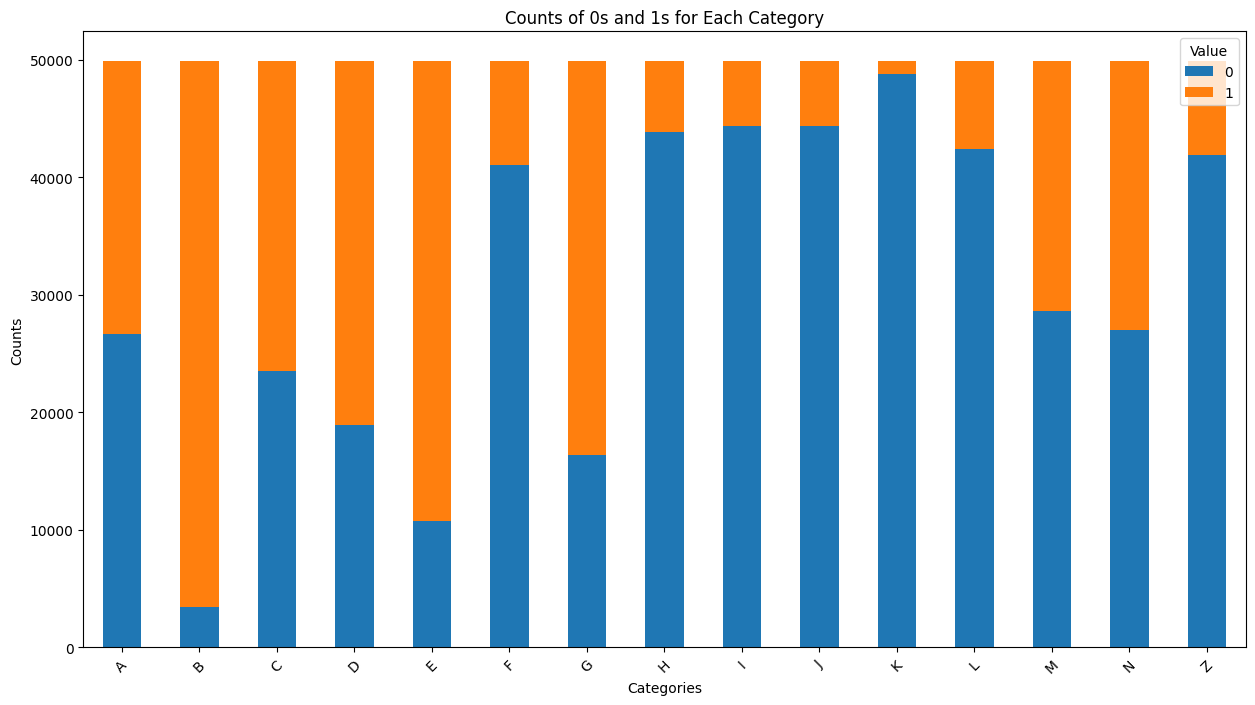

In [19]:
# counts of occurance
counts = {label: data[label].value_counts().sort_index() for label in sorted(col_names.keys())}

# create a dataframe for easier plot
plot_data = pd.DataFrame(counts).T
plot_data.columns = ['0', '1']

# Plot the result
plot_data.plot(kind='bar', figsize=(15, 8), stacked=True)
plt.title('Counts of 0s and 1s for Each Category')
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.legend(title='Value')
plt.show()

In [20]:
plot_data

,0,1
A,26692,23232
B,3419,46505
C,23503,26421
D,18896,31028
E,10773,39151
F,41058,8866
G,16369,33555
H,43866,6058
I,44338,5586
J,44400,5524


## Abstract length

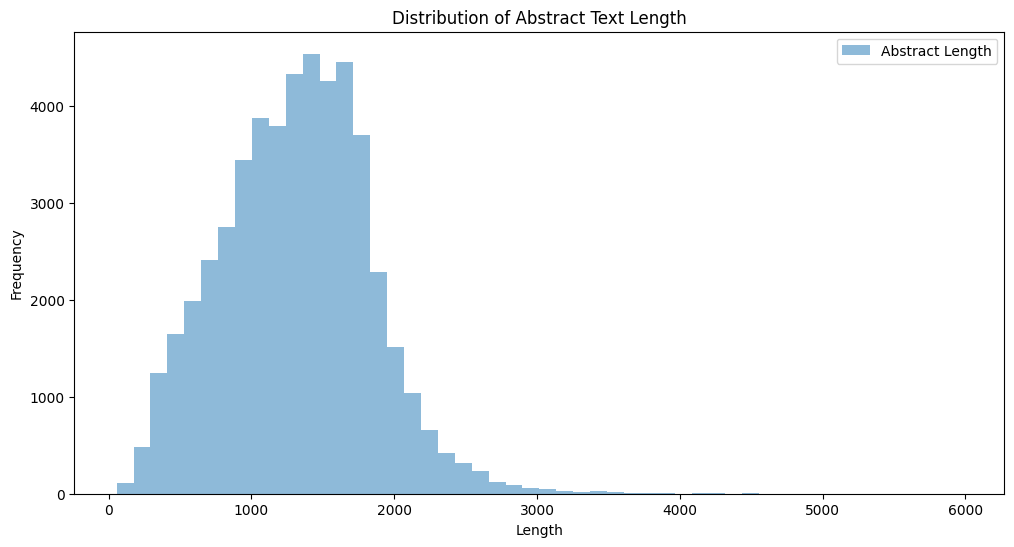

In [21]:
data['abstract_length'] = data['abstractText'].apply(len)

plt.figure(figsize=(12, 6))
plt.hist(data['abstract_length'], bins=50, alpha=0.5, label='Abstract Length')
plt.legend()
plt.title('Distribution of Abstract Text Length')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()


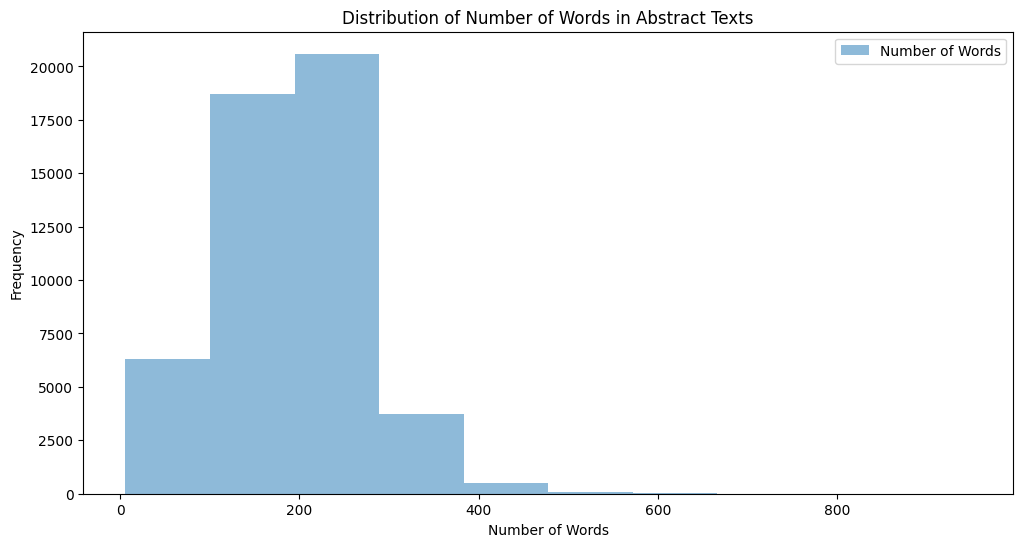

In [22]:
# lets find nr 
data['abstract_word_length'] = data['abstractText'].apply(lambda x: len(x.split()))

# Plot the distribution of the number of words
plt.figure(figsize=(12, 6))
plt.hist(data['abstract_word_length'], bins=10, alpha=0.5, label='Number of Words')
plt.legend()
plt.title('Distribution of Number of Words in Abstract Texts')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

In [23]:
print("Average number of words in Abstract: ", data['abstract_word_length'].mean())

Average number of words in Abstract:  192.05452287476965


In [24]:
data.columns

Index(['Title', 'abstractText', 'meshMajor', 'pmid', 'meshid', 'meshroot',
       'meshroot_labels', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J',
       'K', 'L', 'M', 'N', 'Z', 'abstract_length', 'abstract_word_length'],
      dtype='object')

## Identify a reasonable max_length for tokenization

In [25]:
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

tokenized_lengths = data['abstractText'].apply(lambda x: len(tokenizer.tokenize(x)))


50th percentile: 316.0 tokens
75th percentile: 410.0 tokens
90th percentile: 494.0 tokens
95th percentile: 554.0 tokens
99th percentile: 701.0 tokens
100th percentile: 1797.0 tokens


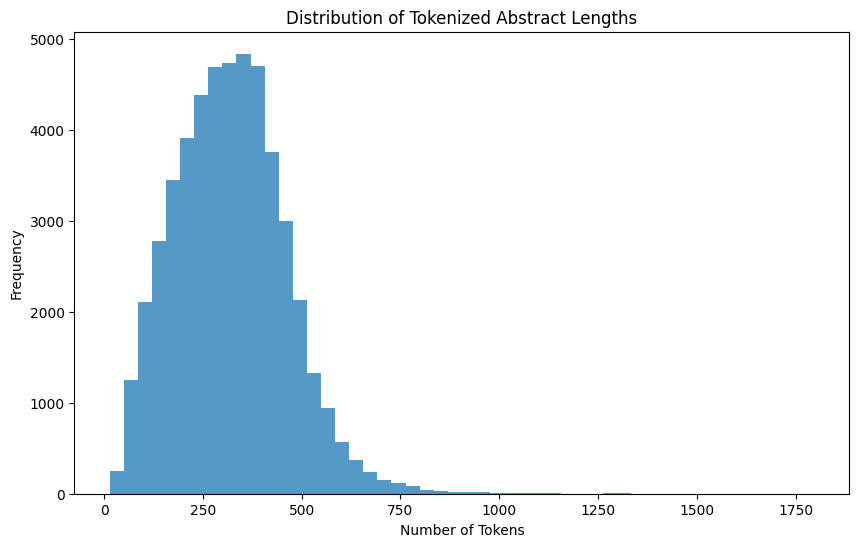

In [26]:
# Analyze the length distribution
lengths = tokenized_lengths.values
percentiles = [50, 75, 90, 95, 99, 100]
length_percentiles = np.percentile(lengths, percentiles)

# Display the percentiles
for p, length in zip(percentiles, length_percentiles):
    print(f'{p}th percentile: {length} tokens')



# Plot the length distribution
plt.figure(figsize=(10, 6))
plt.hist(lengths, bins=50, alpha=0.75)
plt.title('Distribution of Tokenized Abstract Lengths')
plt.xlabel('Number of Tokens')
plt.ylabel('Frequency')
plt.show()


Since we wish to avoid excessive truncation, a reasonable `max_length` should be chosen that covers most of the data. Selecting based on the 95th percentile is a good option. Therefore, **554** should be chosen. However, max_length can not exceed **512**, since this constitutes the upper limit that Bert can handle. It should be noted, that due to memory constraints a lower value will be tested first. 

In [27]:
data  = data.drop(columns=["abstract_length", "abstract_word_length"])
data.head(1)

,Title,abstractText,meshMajor,pmid,meshid,meshroot,meshroot_labels,A,B,C,...,F,G,H,I,J,K,L,M,N,Z
0,Expression of p53 and coexistence of HPV in pr...,Fifty-four paraffin embedded tissue sections f...,"['DNA Probes, HPV', 'DNA, Viral', 'Female', 'H...",8549602,"[['D13.444.600.223.555', 'D27.505.259.750.600....","['Chemicals and Drugs [D]', 'Organisms [B]', '...","[Chemicals and Drugs [D], Organisms [B], Analy...",0,1,1,...,0,0,1,0,0,0,0,0,0,0


# Identify uniqueness of appended one-hot encoded columns

We need to identify how many of the label sequences are unique. This will affect our decision when splitting the data.

In [60]:
# new column
data["labels"] = list(data.iloc[:,7:].values)
data.head(1)

,Title,abstractText,meshMajor,pmid,meshid,meshroot,meshroot_labels,A,B,C,...,G,H,I,J,K,L,M,N,Z,labels
0,Expression of p53 and coexistence of HPV in pr...,Fifty-four paraffin embedded tissue sections f...,"['DNA Probes, HPV', 'DNA, Viral', 'Female', 'H...",8549602,"[['D13.444.600.223.555', 'D27.505.259.750.600....","['Chemicals and Drugs [D]', 'Organisms [B]', '...","[Chemicals and Drugs [D], Organisms [B], Analy...",0,1,1,...,0,1,0,0,0,0,0,0,0,"[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]"


In [29]:
from collections import Counter

sequences = data['labels'].apply(lambda x: tuple(x))
sequence_counts = Counter(sequences)
unique_sequences = [sequence for sequence, count in sequence_counts.items() if count == 1] # sequences that appear only once
num_unique_sequences = len(unique_sequences) # Number of unique sequences that appear only once

print(f'The number of sequences that appear only once is: {num_unique_sequences}')

The number of sequences that appear only once is: 629


In [33]:
# Plot freq of all sequences
sequences = data['labels'].apply(lambda x: tuple(x))
sequence_counts = Counter(sequences)

sequences_list = list(sequence_counts.keys())
counts_list = list(sequence_counts.values())

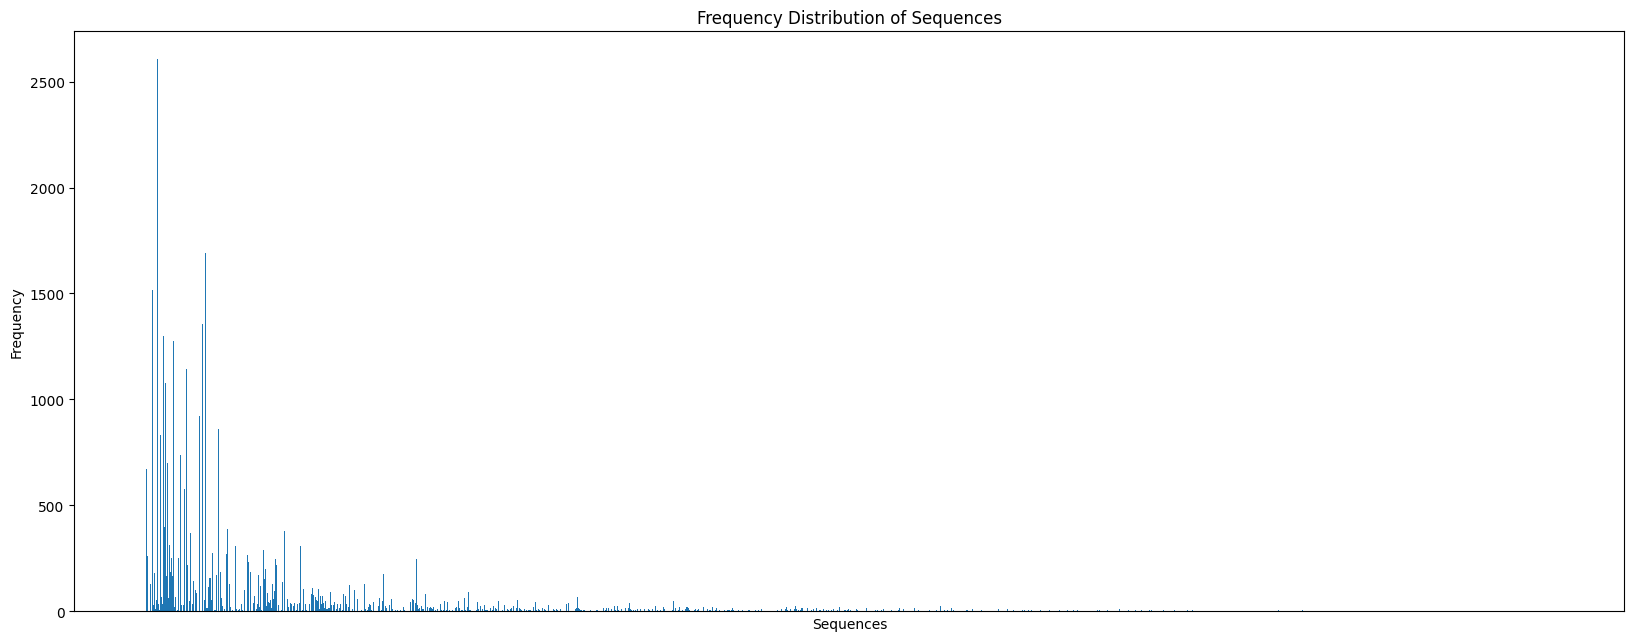

In [32]:
plt.figure(figsize=(20, 10)) ]
plt.bar(range(len(sequences_list)), counts_list, tick_label=[str(seq) for seq in sequences_list])
plt.xlabel('Sequences')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Sequences')
plt.xticks(rotation=90, ha='right')  ]
plt.subplots_adjust(bottom=0.3)  ]
plt.xticks([])  
plt.show()